# week 12 - scaling of CSV file I/O

In [1]:
import numpy as np
import string  
import csv 
import os
import time
import pandas as pd
import random
from matplotlib import pyplot as plt

In [2]:
letters = string.ascii_letters
digits = string.digits
alphanum = letters + digits

In [3]:
def generate_random_string():
    """ Generates random string of legth between 3 and 25"""
    return ''.join(random.choices(alphanum,k = random.randint(3, 26)))

In [4]:
def generate_rows(row_count):
    """Generates rows"""
    column_count = 10
    return [[generate_random_string() for _ in range(column_count)] for _ in range(row_count)]

In [5]:
def generate_file(data_pool, file_size=0.1, num_attempts=1):
        """" Generates files for given size"""
        result=[]

        rows_per_mb = 6900
        target_row_count = int(rows_per_mb * file_size)
        for i in range(num_attempts) :
              
            filename = f"data_{str(file_size)}_MB_attempt_{str(i + 1)}.csv"

            # Taking random rows (for required size) from data pool
            data = random.choices(data_pool, k=target_row_count)
            
            start_time = time.time()
            with open(filename, 'w') as file:
                writer = csv.writer(file)
                writer.writerows(data)
            write_time = time.time() - start_time

            start_time = time.time()
            _ = pd.read_csv(filename)
            read_time = time.time() - start_time
            result.append([i+1,file_size, filename, os.path.getsize(filename) / (1024 * 1024), write_time, read_time])
            print(f"Created file: {filename}\n")
            
        return result


In [6]:
def get_io_times_for_files(sizes : list, attempts_per_size=3):
    rows_per_mb = 6900
    data_generation_start_time = time.time()
    data_pool = generate_rows(max(sizes) * rows_per_mb)
    print(f"Generated data in {time.time() - data_generation_start_time} seconds")
    columns = ['Attempt','Target File Size', 'Generated file name','Generated File Size in MB', 'Time to write file to disk', 'Time to read file from disk']
    results = np.array([generate_file(data_pool, file_size=size, num_attempts=attempts_per_size) for size in sizes])

    return pd.DataFrame(results.reshape(len(sizes) * attempts_per_size, len(columns)), columns=columns)


In [7]:
df = get_io_times_for_files([0.1,1,5,10,100, 500])

Generated data in 78.45425415039062 seconds
Created file: data_0.1_MB_attempt_1.csv

Created file: data_0.1_MB_attempt_2.csv

Created file: data_0.1_MB_attempt_3.csv

Created file: data_1_MB_attempt_1.csv

Created file: data_1_MB_attempt_2.csv

Created file: data_1_MB_attempt_3.csv

Created file: data_5_MB_attempt_1.csv

Created file: data_5_MB_attempt_2.csv

Created file: data_5_MB_attempt_3.csv

Created file: data_10_MB_attempt_1.csv

Created file: data_10_MB_attempt_2.csv

Created file: data_10_MB_attempt_3.csv

Created file: data_100_MB_attempt_1.csv

Created file: data_100_MB_attempt_2.csv

Created file: data_100_MB_attempt_3.csv

Created file: data_500_MB_attempt_1.csv

Created file: data_500_MB_attempt_2.csv

Created file: data_500_MB_attempt_3.csv



In [8]:
df

,Attempt,Target File Size,Generated file name,Generated File Size in MB,Time to write file to disk,Time to read file from disk
0,1,0.1,data_0.1_MB_attempt_1.csv,0.1032705307006836,0.0030031204223632812,0.03699803352355957
1,2,0.1,data_0.1_MB_attempt_2.csv,0.1032571792602539,0.003000974655151367,0.0030024051666259766
2,3,0.1,data_0.1_MB_attempt_3.csv,0.10410690307617188,0.0030052661895751953,0.0019996166229248047
3,1,1,data_1_MB_attempt_1.csv,1.0334043502807617,0.02051377296447754,0.020000457763671875
4,2,1,data_1_MB_attempt_2.csv,1.0327692031860352,0.022991418838500977,0.02200603485107422
5,3,1,data_1_MB_attempt_3.csv,1.0299606323242188,0.020511627197265625,0.018002033233642578
6,1,5,data_5_MB_attempt_1.csv,5.164910316467285,0.10052800178527832,0.09352970123291016
7,2,5,data_5_MB_attempt_2.csv,5.165762901306152,0.0915520191192627,0.09252262115478516
8,3,5,data_5_MB_attempt_3.csv,5.161524772644043,0.09951376914978027,0.09254074096679688
9,1,10,data_10_MB_attempt_1.csv,10.329092025756836,0.1860795021057129,0.2021191120147705


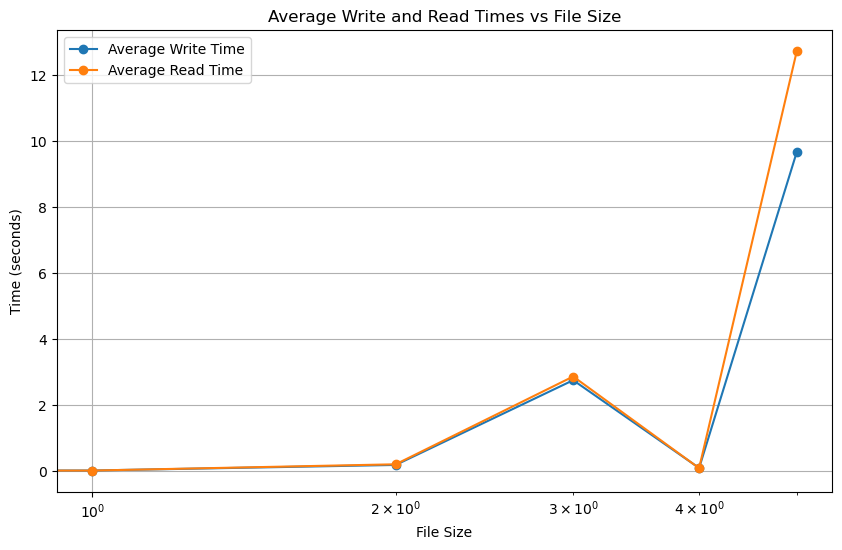

In [10]:
plt.figure(figsize=(10, 6))
df['Time to write file to disk'] = pd.to_numeric(df['Time to write file to disk'])
df['Time to read file from disk'] = pd.to_numeric(df['Time to read file from disk'])

df_timings = df.groupby('Target File Size')[['Time to write file to disk', 'Time to read file from disk']].mean().reset_index().rename(columns={
    'Time to write file to disk' : "Avg time to write file to disk",
    'Time to read file from disk' : "Avg time to read file from disk"
})
plt.semilogx(df_timings['Target File Size'], df_timings['Avg time to write file to disk'], marker='o', label='Average Write Time')
plt.semilogx(df_timings['Target File Size'], df_timings['Avg time to read file from disk'], marker='o', label='Average Read Time')
plt.title('Average Write and Read Times vs File Size')
plt.xlabel('File Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()